### Linear Regression

#### We will apply linear regression on the lending club cleaned and filtered dataset, that we have already cleaned and filtered considering our persona Rick who is a risk averse. We will use the dataset to predict the interest rate.

#### We will be performing 
#### 1. Linear Regression withour regularization
#### 2. Linear Regression with Lasso regularization (L1 Penalty)
#### 3. Linear Regression with Ridge regularization (L2 Penalty)
#### 3. Linear Regression with ElasticNet regularization (L1 and L2 Penalty)

#### Will also plot graphs to see how the hyperparameter tuning increases the model effectivity and prepare a report on the same

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import KFold
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4

#### Get the dataset

In [2]:
dataset = pd.read_csv('../Data/finaldataset.csv')

In [3]:
dataset.pop('Unnamed: 0')

0              0
1             18
2             21
3             25
4             33
5             51
6             59
7             64
8             69
9             76
10            80
11            88
12            90
13            93
14            98
15           110
16           115
17           123
18           128
19           137
20           152
21           156
22           166
23           170
24           171
25           174
26           178
27           184
28           185
29           196
           ...  
157902    886618
157903    886621
157904    886623
157905    886625
157906    886626
157907    886628
157908    886634
157909    886636
157910    886639
157911    886648
157912    886649
157913    886660
157914    886663
157915    886664
157916    886666
157917    886667
157918    886669
157919    886674
157920    886677
157921    886679
157922    886680
157923    886685
157924    886686
157925    886694
157926    886699
157927    886701
157928    886703
157929    8867

#### Check the info, describe and head on the dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157932 entries, 0 to 157931
Data columns (total 86 columns):
dti                           157932 non-null float64
revol_bal                     157932 non-null float64
total_pymnt                   157932 non-null float64
loan_status                   157932 non-null object
loan_amnt                     157932 non-null float64
int_rate                      157932 non-null float64
sub_grade                     157932 non-null int64
annual_inc                    157932 non-null float64
acc_now_delinq                157932 non-null float64
delinq_2yrs                   157932 non-null float64
pub_rec                       157932 non-null float64
open_acc                      157932 non-null float64
inq_last_6mths                157932 non-null float64
revol_util                    157932 non-null float64
emp_length                    157932 non-null int64
addr_state_AL                 157932 non-null int64
addr_state_AR                 15

In [5]:
dataset.describe()

,dti,revol_bal,total_pymnt,loan_amnt,int_rate,sub_grade,annual_inc,acc_now_delinq,delinq_2yrs,pub_rec,...,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_income_ratio
count,157932.000,157932.000,157932.000,157932.000,157932.000,157932.000,157932.000,157932.000,157932.000,157932.000,...,157932.000,157932.000,157932.000,157932.000,157932.000,157932.000,157932.000,157932.000,157932.000,157932.000
mean,18.046,19732.373,8465.720,14397.327,12.437,10.422,87664.368,0.006,0.315,0.226,...,0.014,0.006,0.003,0.213,0.553,0.000,0.000,0.086,0.361,17.730
std,8.679,31227.196,8446.509,8783.156,3.154,4.383,65928.168,0.088,0.857,0.665,...,0.116,0.080,0.051,0.410,0.497,0.008,0.016,0.280,0.480,7.263
min,0.000,0.000,0.000,1000.000,5.320,1.000,4000.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.211
25%,11.300,6502.000,1872.710,7500.000,10.000,7.000,50000.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12.048
50%,17.800,12470.500,5813.350,12000.000,12.690,11.000,74500.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,18.057
75%,24.370,23696.000,12312.440,20000.000,14.650,14.000,108000.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,23.810
max,69.350,2904836.000,51236.151,35000.000,19.200,18.000,6100000.000,6.000,26.000,86.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,30.000


In [6]:
dataset.head()

,dti,revol_bal,total_pymnt,loan_status,loan_amnt,int_rate,sub_grade,annual_inc,acc_now_delinq,delinq_2yrs,...,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_income_ratio
0,27.650,13648.000,5861.071,Fully Paid,5000.000,10.650,7,24000.000,0.000,0.000,...,0,0,0,0,0,0,0,0,1,20.833
1,18.440,0.000,7164.500,Fully Paid,6000.000,11.710,8,84000.000,0.000,2.000,...,0,0,0,0,1,0,0,0,0,7.143
2,13.220,32135.000,14025.400,Charged Off,21000.000,12.420,9,105000.000,0.000,0.000,...,0,0,0,0,0,0,0,0,1,20.000
3,29.440,13707.000,15823.480,Fully Paid,15000.000,9.910,6,92000.000,0.000,0.000,...,0,0,0,0,1,0,0,0,0,16.304
4,11.930,2224.000,5714.592,Fully Paid,5000.000,8.900,5,24044.000,0.000,0.000,...,0,0,0,0,0,0,0,0,1,20.795


##### The dataset is already cleaned and filtered, so we will directly apply the model and check the performance and error metrics

#### Train and Test Split

In [7]:
Y = dataset.pop('int_rate').values
Y

array([10.65, 11.71, 12.42, ...,  9.49, 11.99, 11.99])

In [8]:
loan_status = dataset.pop('loan_status').values
X = dataset.values
X

array([[2.76500000e+01, 1.36480000e+04, 5.86107141e+03, ...,
        0.00000000e+00, 1.00000000e+00, 2.08333333e+01],
       [1.84400000e+01, 0.00000000e+00, 7.16449985e+03, ...,
        0.00000000e+00, 0.00000000e+00, 7.14285714e+00],
       [1.32200000e+01, 3.21350000e+04, 1.40254000e+04, ...,
        0.00000000e+00, 1.00000000e+00, 2.00000000e+01],
       ...,
       [2.56300000e+01, 6.36100000e+03, 2.87473000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 1.87500000e+01],
       [2.36900000e+01, 2.11100000e+04, 4.76625000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.90476190e+01],
       [1.08300000e+01, 3.32660000e+04, 7.94376000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 2.00000000e+01]])

In [28]:
dataset_copy =dataset

###### Normal split without K-Folds

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#### Defining the method that will Train and Evaluate algorithm and will return the error metrics

In [10]:
def get_result(model, X_train, X_test, Y_train, Y_test):
    sc = StandardScaler()  
    X_train = sc.fit_transform(X_train)  
    X_test = sc.transform(X_test) 
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    RMSE = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
    MAPE_test = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
    MAPE_train = np.mean(np.abs((Y_train - y_train_pred) / Y_train)) * 100
    return RMSE, MAPE_test,MAPE_train, y_pred,y_train_pred, model

##### 1. Linear Regression without regularization

In [11]:
lr = LinearRegression()
rmse, mape,mape_train, y_pred,y_train_pred, model = get_result(lr,X_train, X_test, Y_train, Y_test)

In [12]:
print("MAPE on Test : ", mape," mape on train data: ",mape_train)

MAPE on Test :  4.698638582901429  mape on train data:  4.698459427903525


In [13]:
y_train_pred

array([13.29466516, 11.5910824 , 13.92680628, ..., 16.28193933,
       12.49266321, 14.35823328])

In [14]:
y_pred

array([ 9.726672  , 11.21873743,  8.7155636 , ..., 16.18748743,
       13.71397669, 12.02955896])

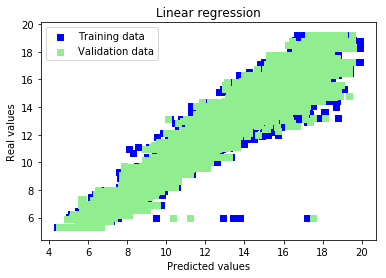

In [15]:
# Plot predictions
plt.scatter(y_train_pred, Y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred, Y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
#plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

#### The MAPE of our model is 4.6995 which is pretty good. That means our model is able to capture most of the explanatory information.

#### Now we can split the train and test data using the K-Fold and find the average MAPE and check if the performance increases

In [137]:
columnnames= dataset_copy.columns.values
x = dataset_copy[columnnames]
y = Y
x.shape

(157932, 84)

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(x)
x_df = pd.DataFrame(x,columns=columnnames)
x_df

C:\Users\navee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\navee\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,dti,revol_bal,total_pymnt,loan_amnt,sub_grade,annual_inc,acc_now_delinq,delinq_2yrs,pub_rec,open_acc,...,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_income_ratio
0,1.107,-0.195,-0.308,-1.070,-0.781,-0.966,-0.071,-0.367,-0.340,-1.614,...,-0.117,-0.081,-0.052,-0.521,-1.112,-0.008,-0.016,-0.306,1.330,0.427
1,0.045,-0.632,-0.154,-0.956,-0.553,-0.056,-0.071,1.966,-0.340,-1.433,...,-0.117,-0.081,-0.052,-0.521,0.900,-0.008,-0.016,-0.306,-0.752,-1.458
2,-0.556,0.397,0.658,0.752,-0.325,0.263,-0.071,-0.367,-0.340,-0.893,...,-0.117,-0.081,-0.052,-0.521,-1.112,-0.008,-0.016,-0.306,1.330,0.313
3,1.313,-0.193,0.871,0.069,-1.009,0.066,-0.071,-0.367,-0.340,-0.712,...,-0.117,-0.081,-0.052,-0.521,0.900,-0.008,-0.016,-0.306,-0.752,-0.196
4,-0.705,-0.561,-0.326,-1.070,-1.237,-0.965,-0.071,-0.367,-0.340,-0.712,...,-0.117,-0.081,-0.052,-0.521,-1.112,-0.008,-0.016,-0.306,1.330,0.422
5,-0.269,0.204,2.513,1.275,-1.009,0.339,-0.071,-0.367,-0.340,-0.172,...,-0.117,-0.081,-0.052,-0.521,-1.112,-0.008,-0.016,-0.306,1.330,0.763
6,0.686,-0.439,0.073,-0.831,1.501,-0.829,-0.071,-0.367,-0.340,-1.433,...,-0.117,-0.081,-0.052,-0.521,0.900,-0.008,-0.016,-0.306,-0.752,0.521
7,0.424,-0.274,0.036,-0.501,-0.781,-0.632,-0.071,-0.367,-0.340,-0.893,...,-0.117,-0.081,-0.052,1.920,-1.112,-0.008,-0.016,-0.306,1.330,0.552
8,-0.710,-0.011,1.195,0.069,0.588,-0.404,-0.071,-0.367,-0.340,-0.712,...,-0.117,-0.081,-0.052,-0.521,-1.112,-0.008,-0.016,3.264,-0.752,0.944
9,0.435,-0.267,0.586,-0.387,0.132,-0.602,-0.071,-0.367,-0.340,0.549,...,-0.117,-0.081,-0.052,-0.521,0.900,-0.008,-0.016,-0.306,-0.752,0.714


In [139]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV


# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV(cv=5)

# Set a minimum threshold of 0.05
sfm = SelectFromModel(clf, threshold=0.05)
sfm.fit(x_df, y)
n_features = sfm.transform(x_df).shape[1]

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
# while n_features > 2:
#     sfm.threshold += 0.1
#     X_transform = sfm.transform(x)
#     n_features = X_transform.shape[1]

# Plot the selected two features from X.
# plt.title(
#     "Features selected from Boston using SelectFromModel with "
#     "threshold %0.3f." % sfm.threshold)
# feature1 = X_transform[:, 0]
# feature2 = X_transform[:, 1]
# plt.plot(feature1, feature2, 'r.')
# plt.xlabel("Feature number 1")
# plt.ylabel("Feature number 2")
# plt.ylim([np.min(feature2), np.max(feature2)])
# plt.show()

In [140]:
x_df[x_df.columns[sfm.get_support(indices=True)]].columns

Index(['total_pymnt', 'loan_amnt', 'sub_grade', 'revol_util',
       'term_ 60 months', 'loan_income_ratio'],
      dtype='object')

In [136]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_df[x_df.columns[sfm.get_support(indices=True)]], Y, test_size = 0.3, random_state = 0)
lr = LinearRegression()
rmse1, mape1,mape_train1, y_pred1,y_train_pred1, model1 = get_result(lr,X_train1, X_test1, Y_train1, Y_test1)
print("MAPE on Test : ", mape1," mape on train data: ",mape_train1)

MAPE on Test :  4.701817205218857  mape on train data:  4.705256782307331


In [49]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)


MAPE = []
MAPE_Train = []
X_test_array=[]
y_pred_array=[]
Y_test_ret_array = []
Y_train_ret_array = []
y_train_pred_array=[]
lr = LinearRegression()
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    rmse, mape,mape_train, y_pred,y_train_pred, model = get_result(lr,X_train, X_test, Y_train, Y_test)
    MAPE.append(mape)
    MAPE_Train.append(mape_train)
    X_test_array.append(X_test)
    y_pred_array.append(y_pred)
    Y_train_ret_array.append(Y_train)
    y_train_pred_array.append(y_train_pred)

TRAIN: [ 31587  31588  31589 ... 157929 157930 157931] TEST: [    0     1     2 ... 31584 31585 31586]
TRAIN: [     0      1      2 ... 157929 157930 157931] TEST: [31587 31588 31589 ... 63171 63172 63173]
TRAIN: [     0      1      2 ... 157929 157930 157931] TEST: [63174 63175 63176 ... 94757 94758 94759]
TRAIN: [     0      1      2 ... 157929 157930 157931] TEST: [ 94760  94761  94762 ... 126343 126344 126345]
TRAIN: [     0      1      2 ... 126343 126344 126345] TEST: [126346 126347 126348 ... 157929 157930 157931]


In [55]:
#test mapes, calculate for train mapes
MAPE

[6.562668527735085,
 228256.80068966217,
 24860282.207902096,
 4.817448288650461,
 4.840897677915978]

In [56]:
np.mean(MAPE_Train)

4.614891388107724

##### The K-Fold has split the dataset in some abstract way that we got unacceptable MAPE value in 2 splits. So we will stick to our conventional split of 70:30 and proceed with regularization

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#### 2. Linear Regression with Ridge regularization (L2 penalty)

##### Ridge regression is an L2 penalized model where we simply add the squared sum of the weights to our cost function.

In [24]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, Y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Trying again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, Y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)


Best alpha : 3.0
Trying again for more precision with alphas centered around 3.0
Best alpha : 3.1500000000000004


In [25]:
rmse, mape, y_pred,y_train_pred, model = get_result(ridge,X_train, X_test, Y_train, Y_test)
print("MAPE on Test : ", mape)

MAPE on Test :  4.699756943042921


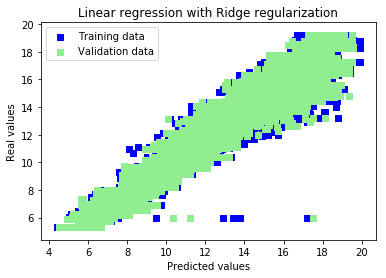

In [26]:
# Plot predictions
plt.scatter(y_train_pred, Y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred, Y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

Ridge picked 83 features and eliminated the other 1 features


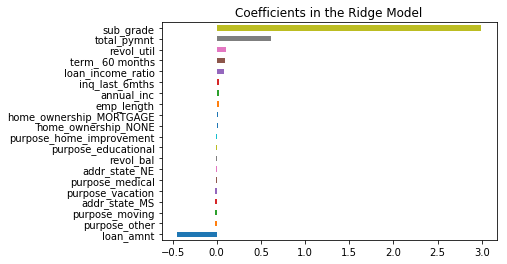

In [27]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = dataset.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

#### 3. Linear Regression with Lasso regularization (L1 penalty)
##### L1 regularization yields sparse feature vectors : most feature weights will be zero. Sparsity can be useful in practice if we have a high dimensional dataset with many features that are irrelevant.

In [29]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1,0.3, 0.6, 1],
               max_iter = 50000, cv = 10)
lasso.fit(X_train,Y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, Y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 6e-05


In [30]:
rmse, mape, y_pred,y_train_pred, model = get_result(lasso,X_train, X_test, Y_train, Y_test)
print("MAPE on Test : ", mape)

MAPE on Test :  4.699522969272883


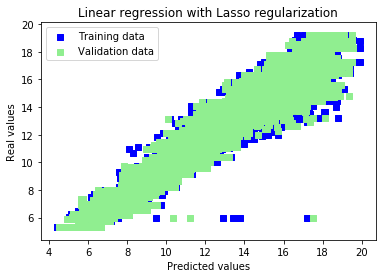

In [31]:
# Plot predictions
plt.scatter(y_train_pred, Y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred, Y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

Lasso picked 79 features and eliminated the other 5 features


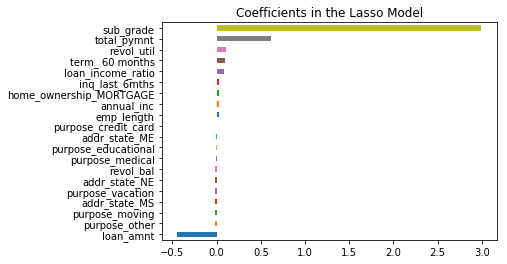

In [32]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = dataset.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

#### 4. Linear Regression with ElasticNet regularization (L1 and L2 penalty)

##### ElasticNet is a compromise between Ridge and Lasso regression. It has a L1 penalty to generate sparsity and a L2 penalty to overcome some of the limitations of Lasso

In [33]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, Y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, Y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, Y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )


Best l1_ratio : 0.3
Best alpha : 0.0001
Try again for more precision with l1_ratio centered around 0.3
Best l1_ratio : 0.3
Best alpha : 0.0001
Now try again for more precision on alpha, with l1_ratio fixed at 0.3 and alpha centered around 0.0001
Best l1_ratio : 0.3
Best alpha : 6e-05


In [34]:
#elasticNet
rmse, mape, y_pred,y_train_pred, model = get_result(elasticNet,X_train, X_test, Y_train, Y_test)
print("MAPE on Test : ", mape)

MAPE on Test :  4.699797676032726


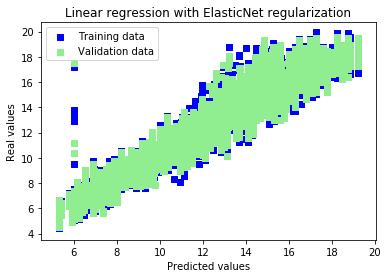

In [35]:
# Plot predictions
plt.scatter(Y_train, y_train_pred, c = "blue", marker = "s", label = "Training data")
plt.scatter(Y_test, y_pred, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

ElasticNet picked 80 features and eliminated the other 4 features


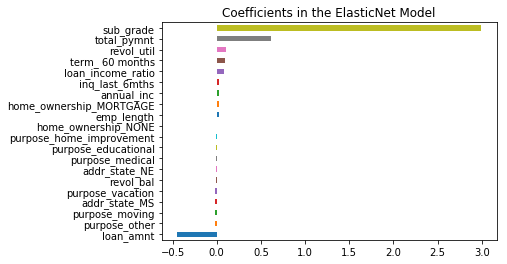

In [36]:
# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = dataset.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

### Conclusion

#### So, the MAPE are: -
##### 1. Linear Regression withour regularization - 4.69959095085297
##### 2. Linear Regression with Lasso regularization (L1 Penalty) - 4.699522969272883
##### 3. Linear Regression with Ridge regularization (L2 Penalty) - 4.6997569430429325
##### 4. Linear Regression with ElasticNet regularization (L1 and L2 Penalty) - 4.699797676032727

#### The model performed slightly better with L1 regularization. It do not need L2 regularization to overcome any shortcoming which is reflected in ElasticNet. 

##### Thus without any regularization also the model performs good, but for slightly better performance we can go with L1 regularization.